Mounting the drive :

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Going to the data directory :

In [0]:
cd drive/My Drive/DataMining/Lab1/Data

/content/drive/My Drive/DataMining/Lab1/Data


Import Libraries :

In [0]:
import pandas as pd
import numpy as np
import matplotlib as mpl 
import matplotlib.pyplot as plt
from random import randint

Read two datasets and append them together:

In [0]:
seg_data = pd.read_csv('segmentation.data', skiprows = 2)
seg_test = pd.read_csv('segmentation.test', skiprows = 2)
seg_full_data = pd.concat([seg_data, seg_test])
seg_full_data

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
BRICKFACE,140.0,125.0,9,0.000000,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
BRICKFACE,188.0,133.0,9,0.000000,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
BRICKFACE,105.0,139.0,9,0.000000,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
BRICKFACE,34.0,137.0,9,0.000000,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
BRICKFACE,39.0,111.0,9,0.000000,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CEMENT,32.0,158.0,9,0.000000,0.0,0.944445,0.862963,0.833333,0.611111,7.962963,6.333334,11.888889,5.666666,-4.888889,11.777778,-6.888889,11.888889,0.520578,-1.982834
CEMENT,8.0,162.0,9,0.111111,0.0,1.611111,2.062962,0.333333,0.133333,8.370370,6.666666,12.000000,6.444445,-5.111111,10.888889,-5.777778,12.000000,0.484805,-2.044946
CEMENT,128.0,161.0,9,0.000000,0.0,0.555555,0.251852,0.777778,0.162963,7.148148,5.555555,10.888889,5.000000,-4.777778,11.222222,-6.444445,10.888889,0.540918,-1.996307
CEMENT,150.0,158.0,9,0.000000,0.0,2.166667,1.633334,1.388889,0.418518,8.444445,7.000000,12.222222,6.111111,-4.333334,11.333333,-7.000000,12.222222,0.503086,-1.943449


Explore Dataset :

In [0]:
#info about the dataset
seg_full_data.info()

#Number of features
att_num = len(seg_full_data.columns)

#Number of Instances
inst_num = len(seg_full_data.index)

#Number of classes
class_num = len(np.unique(seg_full_data.index.values))

#Outputing the values
print('Number of Classes : %s' %class_num)
print('Number of Attributes(Features) : %s' %att_num)
print('Number of Instances : %s' %inst_num)

<class 'pandas.core.frame.DataFrame'>
Index: 2310 entries, BRICKFACE to CEMENT
Data columns (total 19 columns):
REGION-CENTROID-COL     2310 non-null float64
REGION-CENTROID-ROW     2310 non-null float64
REGION-PIXEL-COUNT      2310 non-null int64
SHORT-LINE-DENSITY-5    2310 non-null float64
SHORT-LINE-DENSITY-2    2310 non-null float64
VEDGE-MEAN              2310 non-null float64
VEDGE-SD                2310 non-null float64
HEDGE-MEAN              2310 non-null float64
HEDGE-SD                2310 non-null float64
INTENSITY-MEAN          2310 non-null float64
RAWRED-MEAN             2310 non-null float64
RAWBLUE-MEAN            2310 non-null float64
RAWGREEN-MEAN           2310 non-null float64
EXRED-MEAN              2310 non-null float64
EXBLUE-MEAN             2310 non-null float64
EXGREEN-MEAN            2310 non-null float64
VALUE-MEAN              2310 non-null float64
SATURATION-MEAN         2310 non-null float64
HUE-MEAN                2310 non-null float64
dtypes: float64(

**Histogram** :

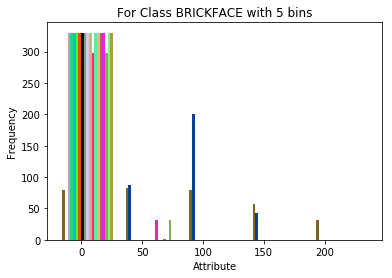

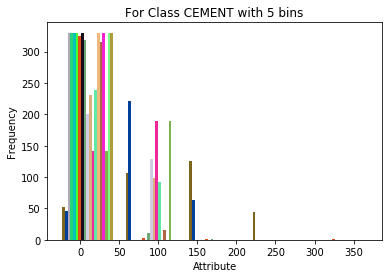

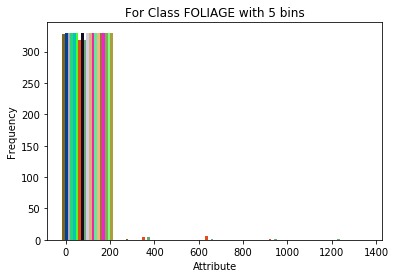

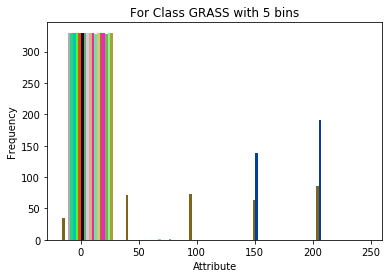

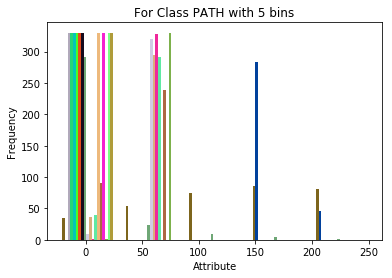

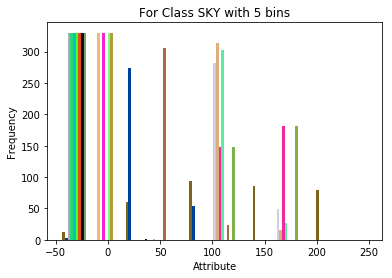

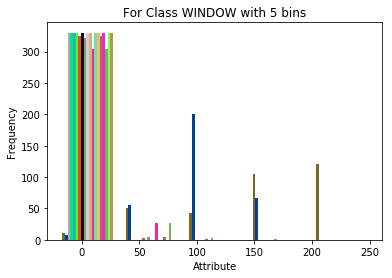

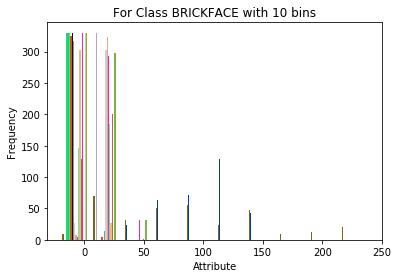

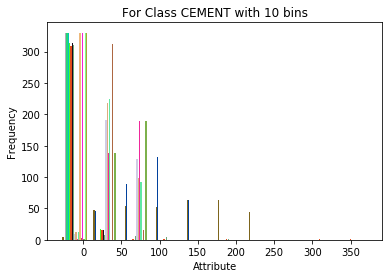

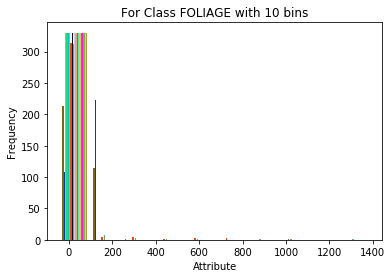

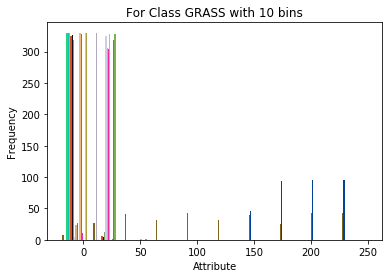

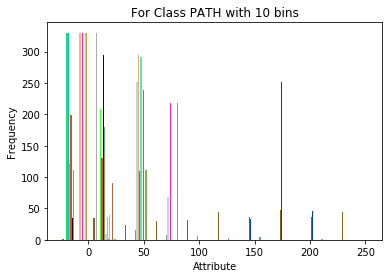

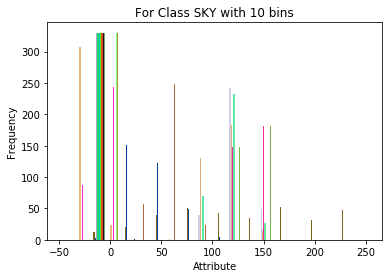

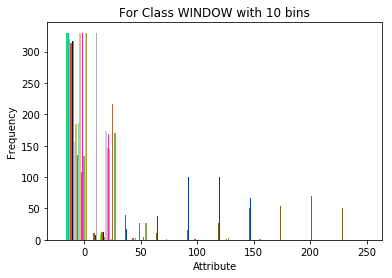

In [0]:
%matplotlib inline
#get all classes
labels = np.unique(seg_full_data.index.values)
plt.rcParams.update({'figure.max_open_warning': 0})

#set the colors for attributes(Taken from a source online)
colors = []
for i in range(19):
  colors.append('#%06X' % randint(0, 0xFFFFFF))
  
#Histograms with 5 Bins
for label in labels :
  p1 = seg_full_data.loc[label]
  plt.hist(p1.values, 5, color=colors)
  plt.title('For Class %s with 5 bins' %label)
  plt.xlabel('Attribute')
  plt.ylabel('Frequency')
  plt.show()
  
#Histograms with 10 bins
for label in labels :
  p1 = seg_full_data.loc[label]
  plt.hist(p1.values, 10,color=colors)
  plt.title('For Class %s with 10 bins' %label)
  plt.xlabel('Attribute')
  plt.ylabel('Frequency')
  plt.show()-

Boxplots :

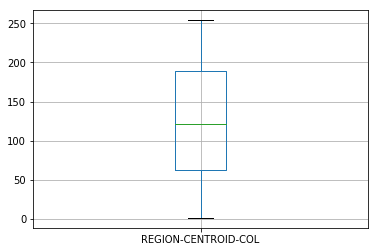

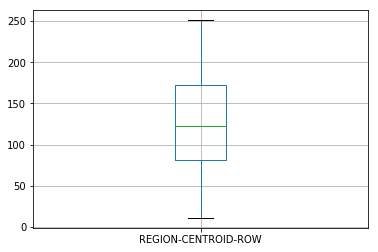

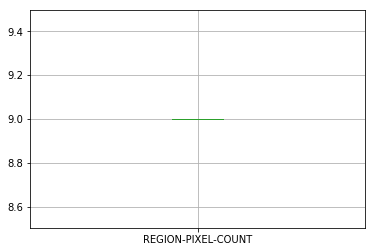

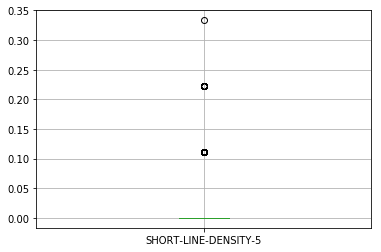

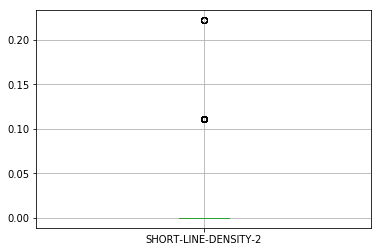

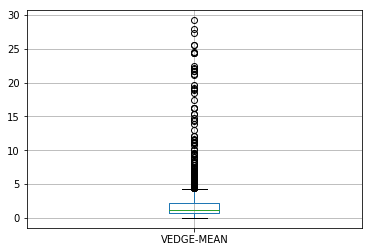

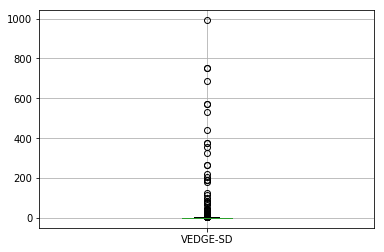

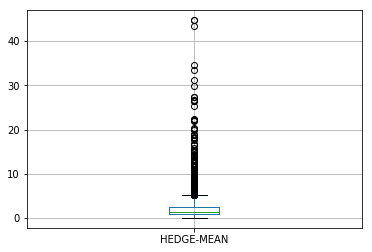

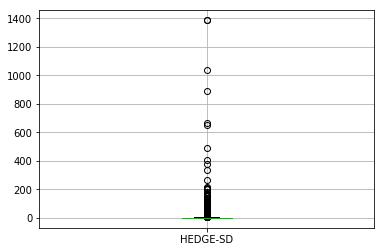

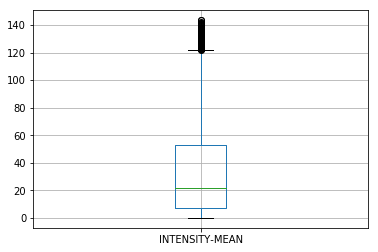

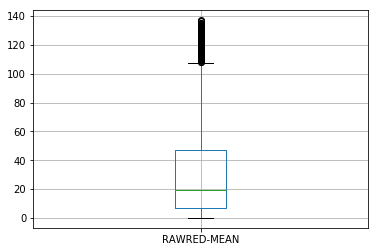

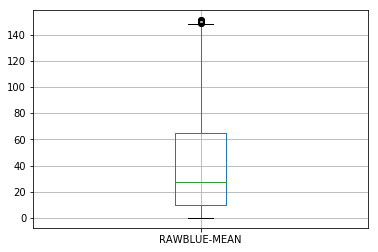

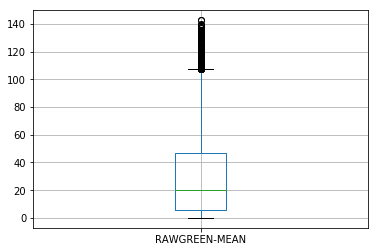

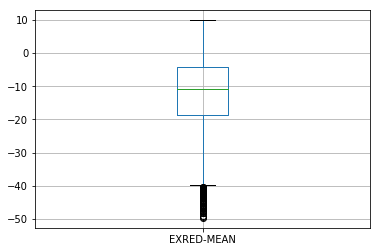

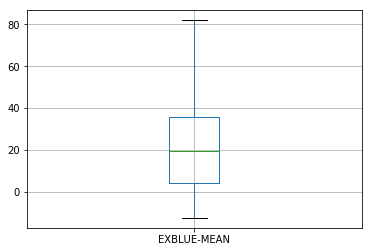

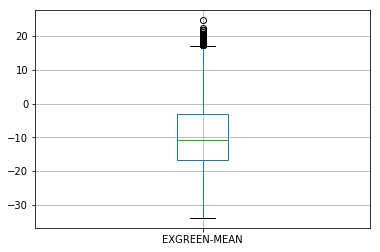

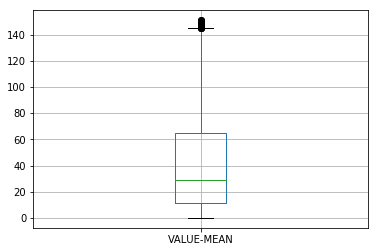

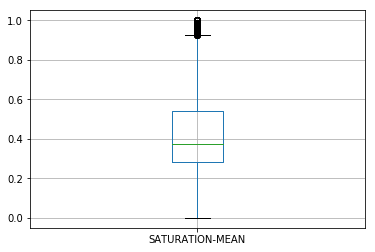

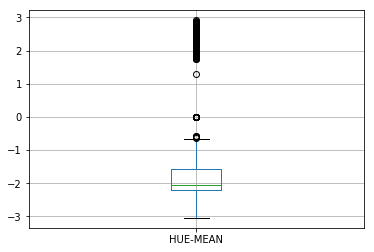

In [0]:
for col in seg_full_data.columns: 
  seg_full_data.boxplot(column = col)
  plt.show()

Correlation Matrix:




                      REGION-CENTROID-COL  ...  HUE-MEAN
REGION-CENTROID-COL              1.000000  ...  0.039299
REGION-CENTROID-ROW              0.026768  ...  0.592930
REGION-PIXEL-COUNT                    NaN  ...       NaN
SHORT-LINE-DENSITY-5            -0.051962  ...  0.112989
SHORT-LINE-DENSITY-2            -0.015964  ... -0.082939
VEDGE-MEAN                      -0.011304  ... -0.097959
VEDGE-SD                         0.021960  ... -0.061591
HEDGE-MEAN                      -0.018914  ... -0.093803
HEDGE-SD                        -0.001939  ... -0.069988
INTENSITY-MEAN                   0.058957  ... -0.329845
RAWRED-MEAN                      0.054673  ... -0.328574
RAWBLUE-MEAN                     0.058169  ... -0.384925
RAWGREEN-MEAN                    0.063381  ... -0.261516
EXRED-MEAN                      -0.086816  ...  0.279745
EXBLUE-MEAN                      0.043098  ... -0.638034
EXGREEN-MEAN                     0.014035  ...  0.800497
VALUE-MEAN                     

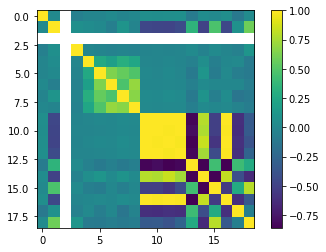

In [0]:
%matplotlib inline
#Corelation Function
def cor_matrix(matrix) :
  p_cor = matrix.corr(method ='pearson')
  return p_cor


#Correlation for our dataset
#get a copy of the data
p_data = seg_full_data.copy()

#Call correlation function
p_cor = cor_matrix(p_data)

#print correlation matrix
print(p_cor)

#Visualizing the correlation matrix
im = plt.imshow(p_cor)
plt.colorbar(im)
plt.show()


Preprocessing

Normalization :

[[0.54940711 0.475      0.         ... 0.05154639 0.5456349  0.3227242 ]
 [0.73913043 0.50833333 0.         ... 0.05596466 0.53858024 0.35579661]
 [0.41106719 0.53333333 0.         ... 0.05007364 0.5326279  0.34889197]
 ...
 [0.50197628 0.625      0.         ... 0.07216495 0.5409177  0.17591546]
 [0.58893281 0.6125     0.         ... 0.08100147 0.50308645 0.18478933]
 [0.48616601 0.62916667 0.         ... 0.09646539 0.4799313  0.17037463]]


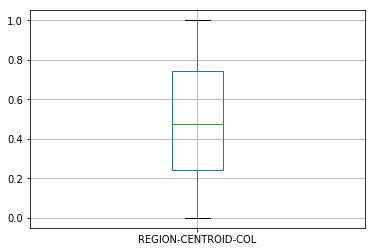

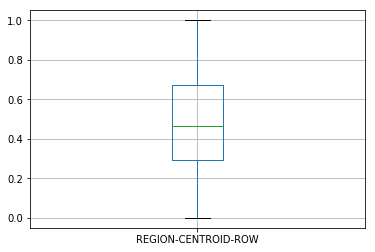

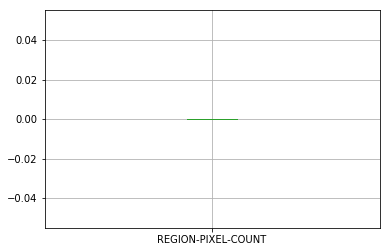

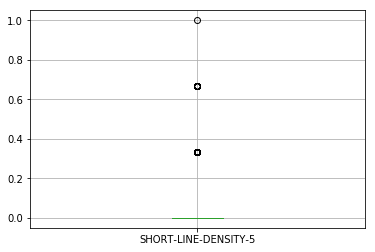

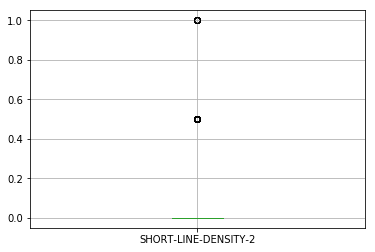

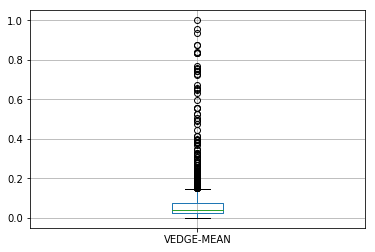

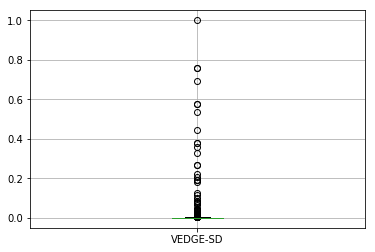

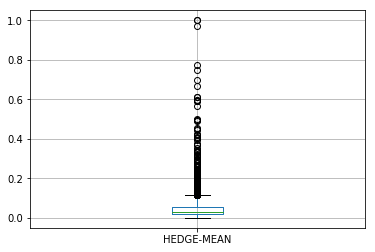

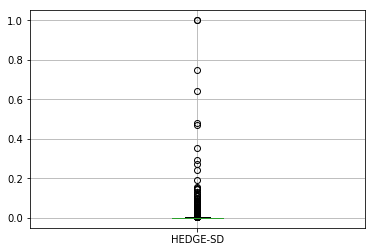

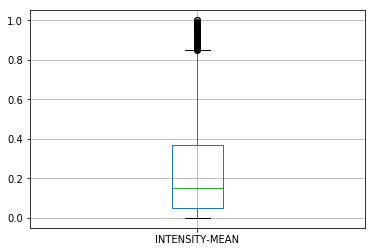

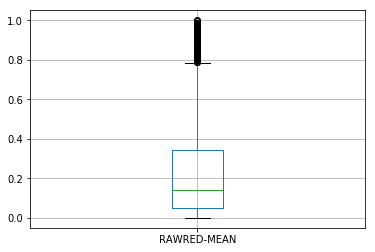

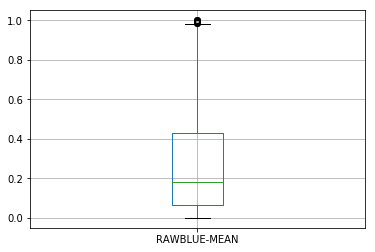

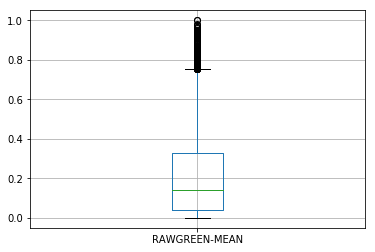

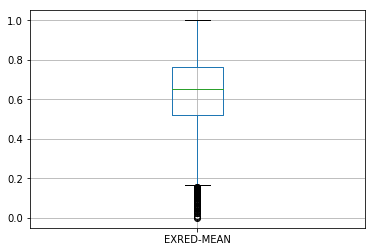

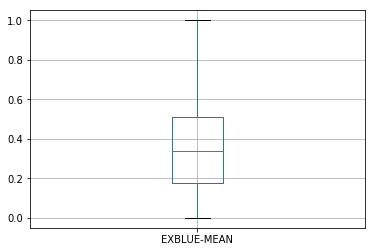

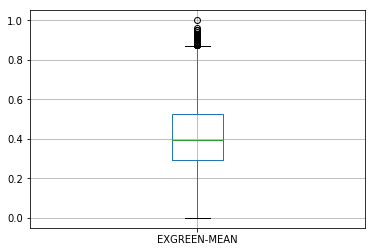

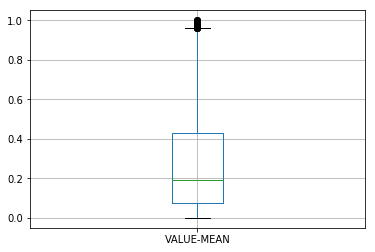

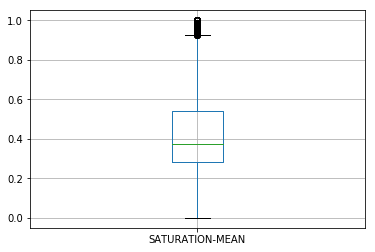

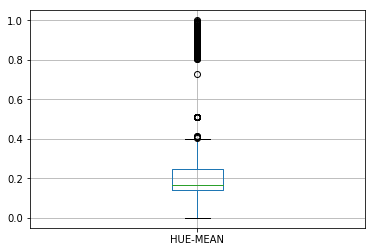

In [0]:
from sklearn.preprocessing import MinMaxScaler
#Get copy of data
min_max_data = seg_full_data.copy()

#Initializing the scaler
scaler = MinMaxScaler()

#fit and transform the data
min_max_norm = scaler.fit_transform(min_max_data)

#output the normalized data
print(min_max_norm)

#get datafram for data
df_mnmx_norm = pd.DataFrame(data = min_max_norm,
                      columns = min_max_data.columns,
                       index =min_max_data.index)

#Boxplot for the data
for col in df_mnmx_norm.columns: 
  df_mnmx_norm.boxplot(column = col)
  plt.show()

           REGION-CENTROID-COL  REGION-CENTROID-ROW  ...  SATURATION-MEAN  HUE-MEAN
BRICKFACE             0.206827             0.027539  ...         0.520205  0.156038
BRICKFACE             0.864896             0.166738  ...         0.489298  0.283547
BRICKFACE            -0.273014             0.271138  ...         0.463221  0.256926
BRICKFACE            -1.246407             0.236338  ...         0.642864  0.400405
BRICKFACE            -1.177858            -0.216061  ...         0.595925  0.121116
BRICKFACE            -1.493183             0.079739  ...         0.589744  0.244069
BRICKFACE            -1.356085            -0.981659  ...         0.044012 -0.168482
BRICKFACE            -1.520602            -0.233461  ...        -0.254292  0.011522
BRICKFACE            -1.561732            -0.268261  ...        -0.167075  0.039329
BRICKFACE            -0.547209            -0.390060  ...        -0.096823 -0.126668
BRICKFACE            -1.465763             0.375538  ...         0.760695  0

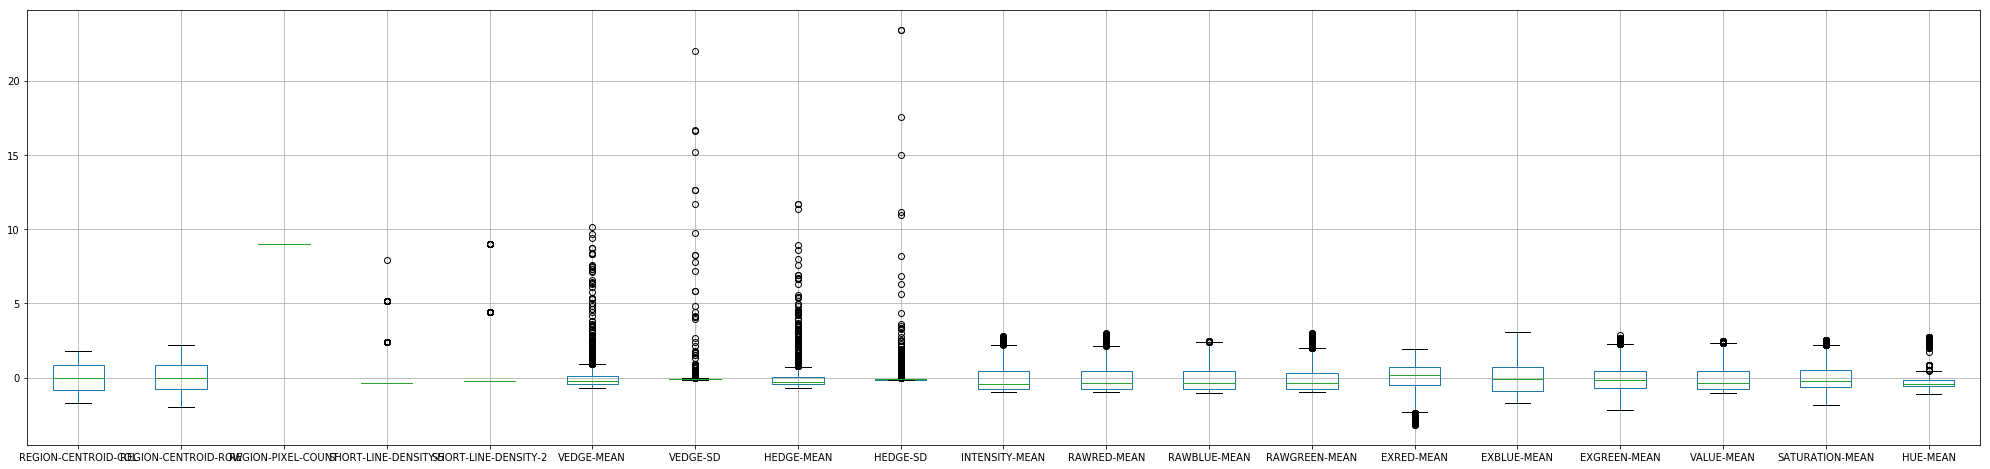

In [0]:
#@title Default title text
from scipy.stats import zscore
#take copy of data
temp = seg_full_data.copy()

#apply zscore normalization,ignore any NaN values and leave its value untoushed
zscore_norm = temp.apply(lambda x: x if np.std(x) == 0 else zscore(x))

#zscore_norm = zscore(seg_full_data)
print(zscore_norm)

#boxplot
zscore_norm.boxplot(figsize=[35,8])
plt.show()

Dimensionality reduction :

• Feature Projection :

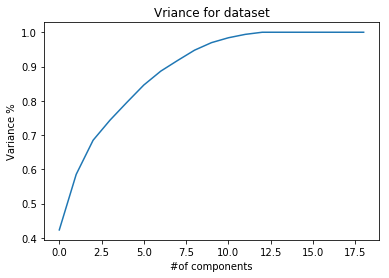

[0.42341135 0.58544784 0.68504234 0.74361518 0.79559514 0.84609887
 0.88651302 0.91771445 0.94771247 0.96966275 0.98388365 0.99381892
 0.99998259 1.         1.         1.         1.         1.
 1.        ]
[0.42341135 0.16203649 0.09959451 0.05857283 0.05197997 0.05050372
 0.04041415 0.03120143 0.02999802 0.02195028 0.0142209  0.00993527]


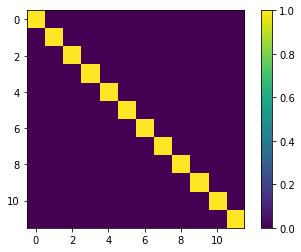

In [0]:
from sklearn.decomposition import PCA
#get the pca handler
pca = PCA().fit(zscore_norm)

#figure out the suitable number of components to pick
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('#of components')
plt.ylabel('Variance %')
plt.title('Vriance for dataset')
plt.show()
print (pca.explained_variance_ratio_.cumsum())


#The plot shows that using about 11-13 components would be sufficient
#to achieve 98-99% of variance
#We'll choose 12 to achieve about 99.381898% of variance
pca_12 = PCA(n_components=12)
pca_data = pd.DataFrame(data = pca_12.fit_transform(zscore_norm),
                      columns = zscore_norm.columns[0:12],
                       index =zscore_norm.index)

#variance
print(pca_12.explained_variance_ratio_)
7k
#getting correlation matrix
p_cor = cor_matrix(pca_data)

#show correlation matrix
im = plt.imshow(p_cor)
plt.colorbar(im)
plt.show()

• Feature selection 

[[0.04311903 0.0534846  0.05081001 0.02494154]
 [0.0464756  0.06077796 0.05154639 0.02727981]
 [0.04260263 0.05510535 0.04786451 0.02494154]
 ...
 [0.04983217 0.04051864 0.07216495 0.03507404]
 [0.0588691  0.05105349 0.08100147 0.04286828]
 [0.0699716  0.05834684 0.09646539 0.05300078]]
          0         1         2         3
0  1.000000  0.998112  0.995809  0.995842
1  0.998112  1.000000  0.990813  0.994056
2  0.995809  0.990813  1.000000  0.984659
3  0.995842  0.994056  0.984659  1.000000


<function matplotlib.pyplot.show>

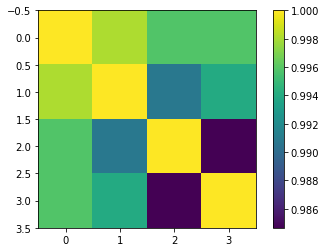

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Feature extraction
test = SelectKBest(score_func=chi2, k=4).fit_transform(min_max_norm, seg_full_data.index.values)

data_frame_kbest = pd.DataFrame(data=test[0:, 0:],
                                index=seg_full_data.index,
                                columns=[0, 1, 2, 3])
print(test)

#correlation
df_cor = cor_matrix(data_frame_kbest)
print(df_cor)

im = plt.imshow(df_cor)
plt.colorbar(im)
plt.show


In [0]:
labels = np.unique(seg_full_data.index.values)
print(labels)

['BRICKFACE' 'CEMENT' 'FOLIAGE' 'GRASS' 'PATH' 'SKY' 'WINDOW']
